# Lab 7 and 8 - HERA *The final showdown*
#### Aidan Berres
#### Physics 434
#### 12/13/20

In [12]:
from pyuvdata import UVData
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

In [13]:
uv = UVData()
uv.read('hera1.hd5',file_type='uvh5')
p=uv.get_antpairs()
freqs = uv.freq_array[0]*1e-6

In [28]:
bl1=p[506]
d1 = uv.get_data(bl1)
d1.shape

(20, 1536)

## Waterfall plots

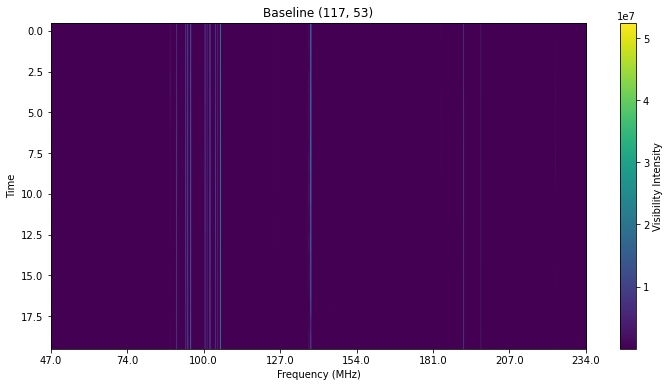

In [29]:
fig, axs = plt.subplots(1,1,figsize=(12,6))
im = plt.imshow(np.abs(d1),aspect='auto')
cbar = fig.colorbar(im,label='Visibility Intensity')
freqs = uv.freq_array[0]*1e-6 #gets frequencies associated with each channel, in MHz
axs.set_ylabel('Time')
axs.set_xlabel('Frequency (MHz)')
xticks = [int(i) for i in np.linspace(0,len(freqs)-1,8)]
_ = axs.set_xticks(xticks)
xticklabels = np.around(freqs[xticks],0)
_ = axs.set_xticklabels(xticklabels)
plt.title(f'Baseline {bl1}')
plt.show()

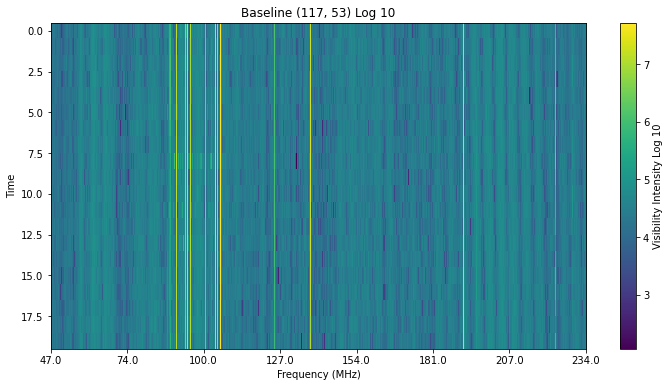

In [37]:
fig, axs = plt.subplots(1,1,figsize=(12,6))
im = plt.imshow(np.log10(np.abs(d1)),aspect='auto',interpolation='nearest')
cbar = fig.colorbar(im,label='Visibility Intensity Log 10')
freqs = uv.freq_array[0]*1e-6 #gets frequencies associated with each channel, in MHz
axs.set_ylabel('Time')
axs.set_xlabel('Frequency (MHz)')
xticks = [int(i) for i in np.linspace(0,len(freqs)-1,8)]
_ = axs.set_xticks(xticks)
xticklabels = np.around(freqs[xticks],0)
_ = axs.set_xticklabels(xticklabels)
plt.title(f'Baseline {bl1} Log 10')
plt.show()

## Signal removal

In [65]:
def rm_bkg(bl):
    sr1 = []
    for i in range(19):
        sr1.append(bl[i+1]-bl[i])
    sr1=np.array(sr1)
    return sr1

In [66]:
sr1=rm_bkg(d1)

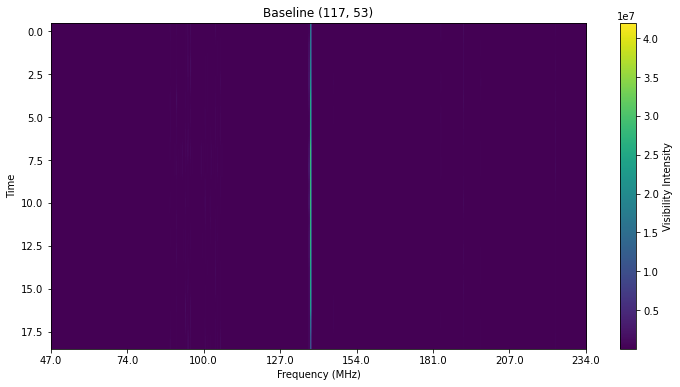

In [67]:
fig, axs = plt.subplots(1,1,figsize=(12,6))
im = plt.imshow(np.abs(sr1),aspect='auto')
cbar = fig.colorbar(im,label='Visibility Intensity')
freqs = uv.freq_array[0]*1e-6 #gets frequencies associated with each channel, in MHz
axs.set_ylabel('Time')
axs.set_xlabel('Frequency (MHz)')
xticks = [int(i) for i in np.linspace(0,len(freqs)-1,8)]
_ = axs.set_xticks(xticks)
xticklabels = np.around(freqs[xticks],0)
_ = axs.set_xticklabels(xticklabels)
plt.title(f'Baseline {bl1}')
plt.show()

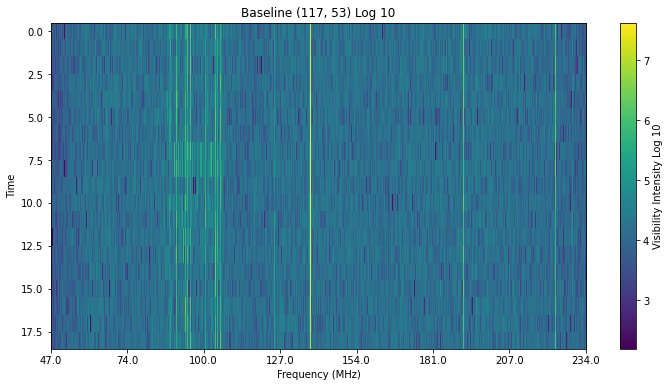

In [38]:
fig, axs = plt.subplots(1,1,figsize=(12,6))
im = plt.imshow(np.log10(np.abs(sr1)),aspect='auto',interpolation='nearest')
cbar = fig.colorbar(im,label='Visibility Intensity Log 10')
freqs = uv.freq_array[0]*1e-6 #gets frequencies associated with each channel, in MHz
axs.set_ylabel('Time')
axs.set_xlabel('Frequency (MHz)')
xticks = [int(i) for i in np.linspace(0,len(freqs)-1,8)]
_ = axs.set_xticks(xticks)
xticklabels = np.around(freqs[xticks],0)
_ = axs.set_xticklabels(xticklabels)
plt.title(f'Baseline {bl1} Log 10')
plt.show()

## Single antenna pair plots

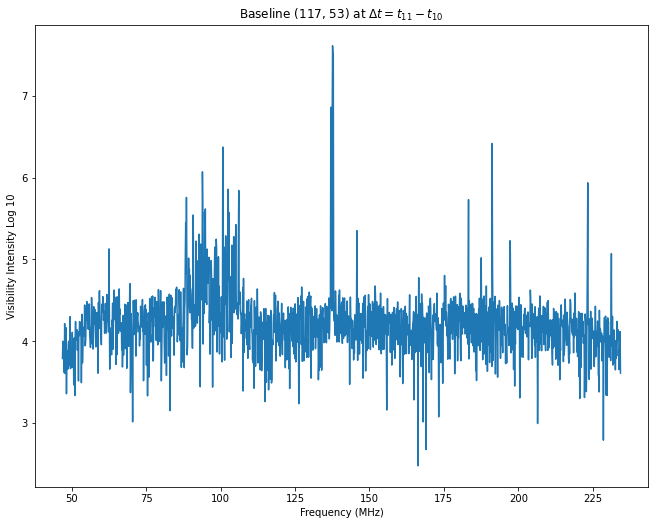

In [52]:
n=10
plt.subplots(figsize=(11,8.5))
plt.plot(freqs,np.log10(np.abs(sr1[n])))
plt.xlabel('Frequency (MHz)')
plt.ylabel('Visibility Intensity Log 10')
plt.title(fr"Baseline {bl1} at $\Delta t = t_{ {n+1} } - t_{ {n} }$",fontsize=12);

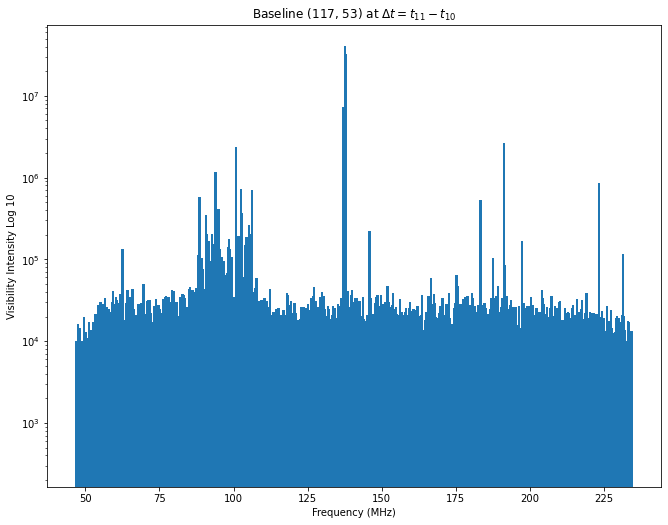

In [58]:
plt.subplots(figsize=(11,8.5))
plt.yscale('log')
plt.bar(freqs,(np.abs(sr1[n])))
plt.xlabel('Frequency (MHz)')
plt.ylabel('Visibility Intensity Log 10')
plt.title(fr"Baseline {bl1} at $\Delta t = t_{ {n+1} } - t_{ {n} }$",fontsize=12);

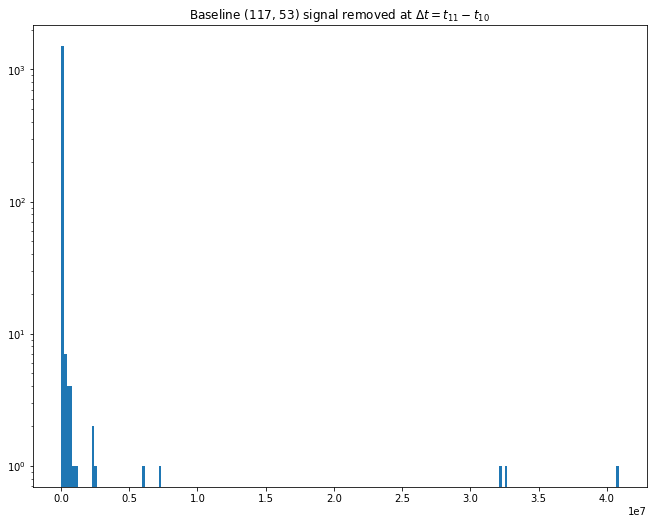

In [120]:
plt.subplots(figsize=(11,8.5))
plt.yscale('log')
plt.hist(np.abs(sr1[n]),bins=200);
plt.title(fr"Baseline {bl1} signal removed at $\Delta t = t_{ {n+1} } - t_{ {n} }$",fontsize=12);

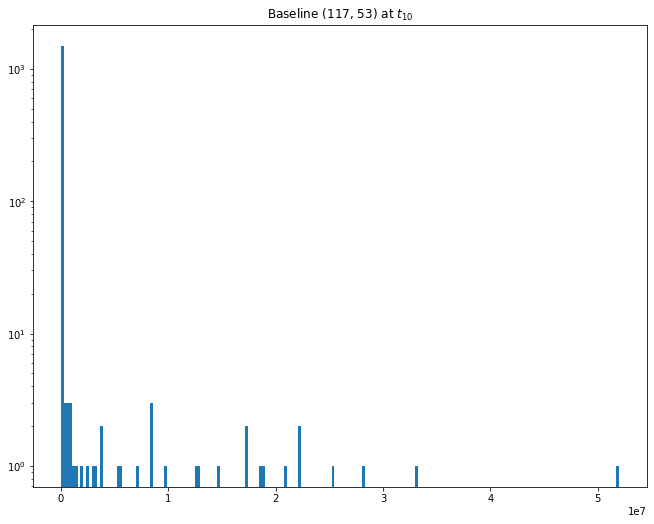

In [122]:
plt.subplots(figsize=(11,8.5))
plt.yscale('log')
plt.hist(np.abs(d1[n]),bins=200);
plt.title(fr"Baseline {bl1} at $t_{ {n} }$",fontsize=12);

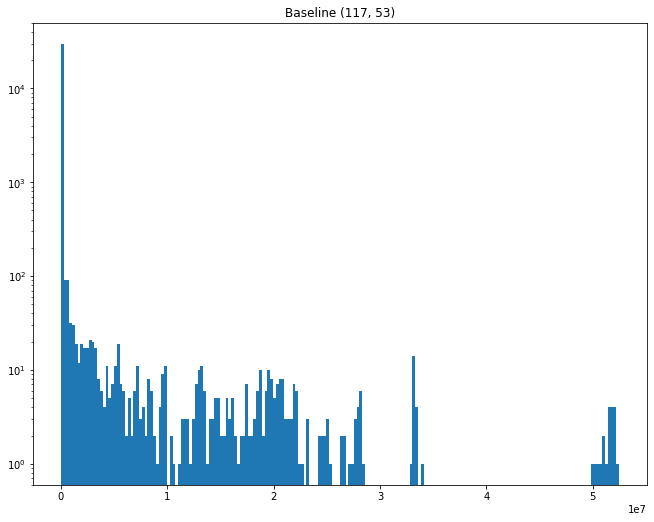

In [124]:
plt.subplots(figsize=(11,8.5))
plt.yscale('log')
plt.hist(np.abs(d1.flatten()),bins=200);
plt.title(fr"Baseline {bl1}",fontsize=12);

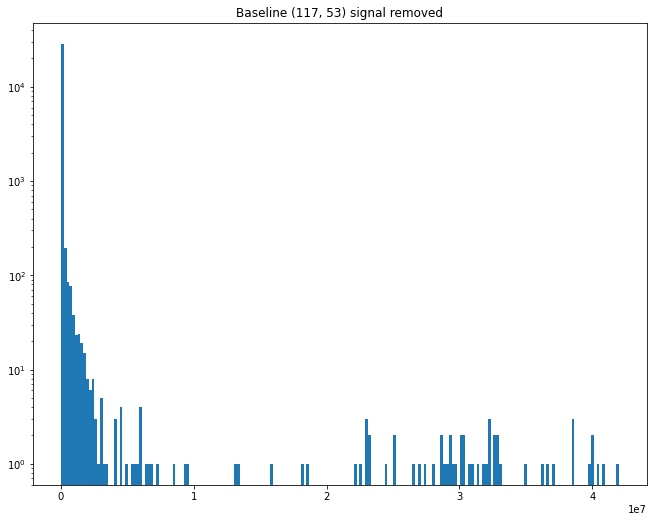

In [123]:
plt.subplots(figsize=(11,8.5))
plt.yscale('log')
plt.hist(np.abs(sr1.flatten()),bins=200);
plt.title(fr"Baseline {bl1} signal removed",fontsize=12);

## Average visibility plots

In [60]:
ns=[]
for i in range(len(p)):
    if p[i][0]!=p[i][1]:
        ns.append(p[i])

In [76]:
len(ns)

630

## Bad Ideas are afoot, DO NOT signal remove OR average the WHOLE $v_{ab}$ baseline set you idiot
I am using a random sample of 100 cross-correlation baselines from the original list of **630** cross-correlation baslines

In [94]:
rni= np.random.choice(np.arange(len(ns),dtype=int),size=100,replace=False)
npa=np.array(ns)
rns=npa[rni]

In [95]:
avg1=[]
for i in range(20):
    bt = []
    for j in range(len(rns)):
        d = abs(uv.get_data(rns[j]))
        bt.append(d[i])
    bt = np.array(bt)
    mc=bt.mean(axis=0)
    avg1.append(mc)
avg1=np.array(avg1)
avg1.shape

(20, 1536)

### Signal Removed

In [111]:
avg1sr=[]
for i in range(19):
    bt = []
    for j in range(len(rns)):
        d = abs(rm_bkg(uv.get_data(rns[j])))
        bt.append(d[i])
    bt = np.array(bt)
    mc=bt.mean(axis=0)
    avg1sr.append(mc)
avg1sr=np.array(avg1sr)
avg1sr.shape

(19, 1536)

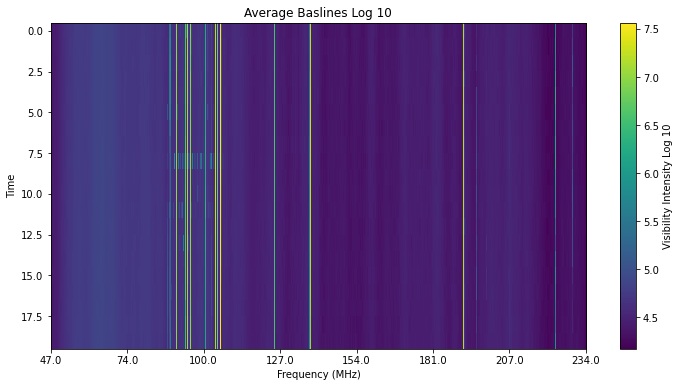

In [96]:
fig, axs = plt.subplots(1,1,figsize=(12,6))
im = plt.imshow(np.log10(np.abs(avg1)),aspect='auto',interpolation='nearest')
cbar = fig.colorbar(im,label='Visibility Intensity Log 10')
freqs = uv.freq_array[0]*1e-6 #gets frequencies associated with each channel, in MHz
axs.set_ylabel('Time')
axs.set_xlabel('Frequency (MHz)')
xticks = [int(i) for i in np.linspace(0,len(freqs)-1,8)]
_ = axs.set_xticks(xticks)
xticklabels = np.around(freqs[xticks],0)
_ = axs.set_xticklabels(xticklabels)
plt.title(f'Average Baslines Log 10')
plt.show()

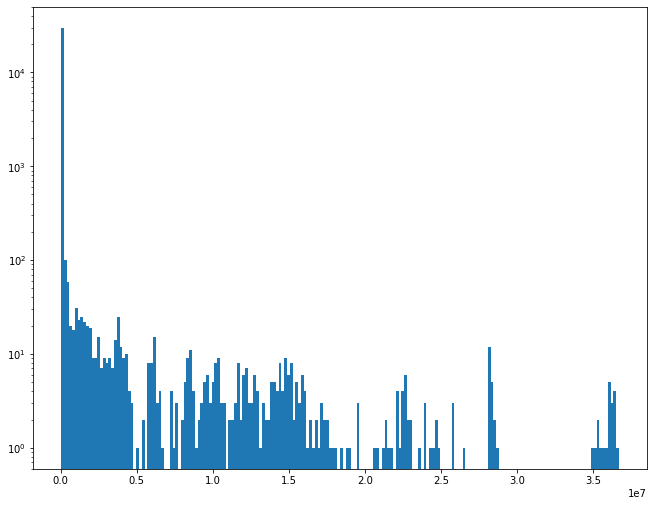

In [125]:
plt.subplots(figsize=(11,8.5))
plt.yscale('log')
plt.hist(avg1.flatten(),bins=200);

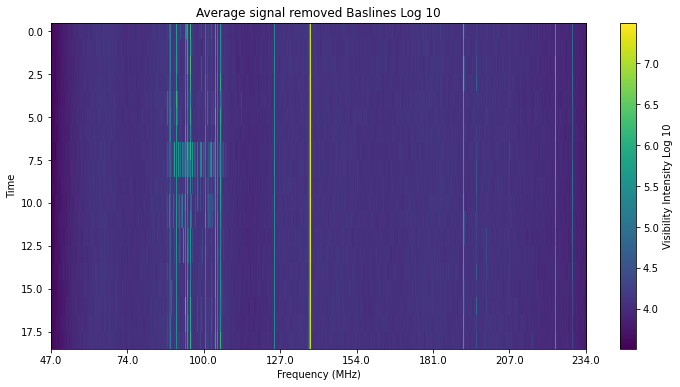

In [112]:
fig, axs = plt.subplots(1,1,figsize=(12,6))
im = plt.imshow(np.log10(np.abs(avg1sr)),aspect='auto',interpolation='nearest')
cbar = fig.colorbar(im,label='Visibility Intensity Log 10')
freqs = uv.freq_array[0]*1e-6 #gets frequencies associated with each channel, in MHz
axs.set_ylabel('Time')
axs.set_xlabel('Frequency (MHz)')
xticks = [int(i) for i in np.linspace(0,len(freqs)-1,8)]
_ = axs.set_xticks(xticks)
xticklabels = np.around(freqs[xticks],0)
_ = axs.set_xticklabels(xticklabels)
plt.title(f'Average signal removed Baslines Log 10')
plt.show()

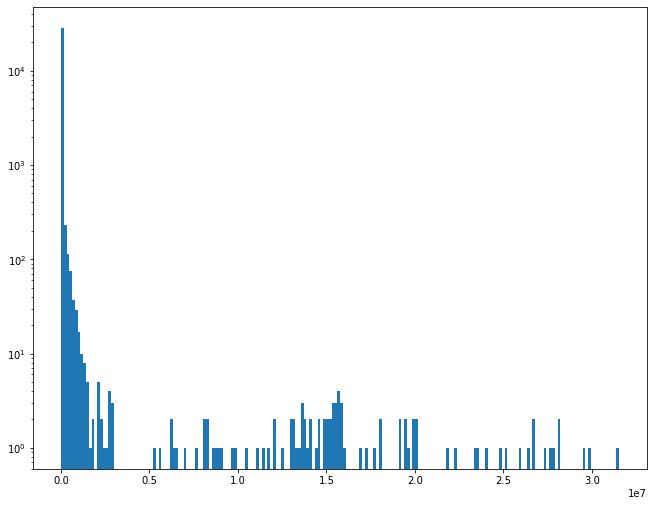

In [117]:
plt.subplots(figsize=(11,8.5))
plt.yscale('log')
plt.hist(avg1sr.flatten(),bins=200);